### This file plots the processed csv files with matplotlib

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [3]:
date = '2018-11-17_17h13'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/' + date + '/'

In [4]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## Response-time plot for sharded get requests

In [6]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'mem_rt.csv')
df_rt

,client,worker,ratio,sharded_rt_mean,sharded_rt_std,nonsharded_rt_mean,nonsharded_rt_std
0,12,64,1:1,1.998333,0.021257,1.959444,0.023027
1,12,64,1:3,1.979444,0.013076,1.942778,0.003143
2,12,64,1:6,1.970556,0.006431,1.956111,0.028556
3,12,64,1:9,1.981111,0.020200,1.955000,0.023134


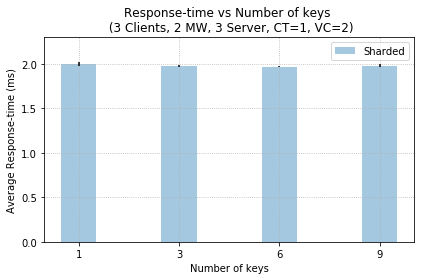

In [31]:
n_groups = 4

means_latency = df_rt['sharded_rt_mean']
std_latency = df_rt['sharded_rt_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_latency, bar_width,
                alpha=opacity,
                yerr=std_latency,
                label='Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Response-time vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_latency)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_rt_sharded.png", dpi = 150)


## Response-time plot for non-sharded get requests

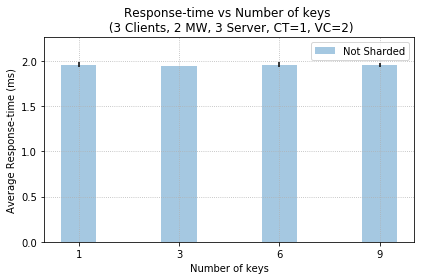

In [32]:
n_groups = 4

means_latency = df_rt['nonsharded_rt_mean']
std_latency = df_rt['nonsharded_rt_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_latency, bar_width,
                alpha=opacity,
                yerr=std_latency,
                label='Not Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Response-time vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_latency)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_rt_nonsharded.png", dpi = 150)


## Percentile plot for sharded get requests

In [37]:
# read data into pandas dataframe
df_perc = pd.read_csv(base_path + 'mem_percentiles.csv')
df_perc

,client,worker,ratio,s_25_mean,s_25_std,s_50_mean,s_50_std,s_75_mean,s_75_std,s_90_mean,...,n_25_mean,n_25_std,n_50_mean,n_50_std,n_75_mean,n_75_std,n_90_mean,n_90_std,n_99_mean,n_99_std
0,12,64,1:1,1.344444,0.007857,1.611111,0.007857,2.033333,0.013608,2.838889,...,1.338889,0.020787,1.588889,0.020787,2.016667,0.036004,2.777778,0.056656,7.327778,0.087489
1,12,64,1:3,1.344444,0.007857,1.611111,0.007857,2.027778,0.015713,2.800000,...,1.322222,0.020787,1.583333,0.013608,2.022222,0.020787,2.744444,0.034247,7.172222,0.145509
2,12,64,1:6,1.338889,0.007857,1.583333,0.013608,2.033333,0.013608,2.794444,...,1.322222,0.020787,1.594444,0.015713,2.022222,0.015713,2.794444,0.067128,7.294444,0.102138
3,12,64,1:9,1.350000,0.023570,1.594444,0.020787,2.027778,0.020787,2.850000,...,1.350000,0.013608,1.605556,0.015713,2.027778,0.020787,2.761111,0.043744,7.200000,0.163299


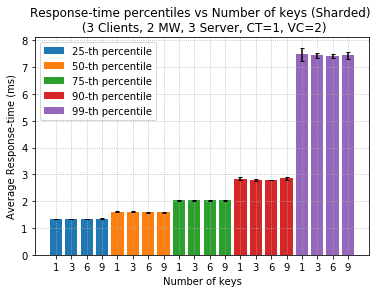

In [38]:
f = plt.figure()
plt.title("Response-time percentiles vs Number of keys (Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of keys")

percentiles = [25,50,75,90,99]

for start_idx in [0,1,2,3,4]:
    percentile = percentiles[start_idx]
    vals = df_perc['s_{}_mean'.format(percentile)]
    err = df_perc['s_{}_std'.format(percentile)]

    plt.bar(x = range(1 + start_idx*4, 1 + (start_idx + 1)*4), 
            height = vals, yerr = err, capsize = 2, label='{}-th percentile'.format(percentile))
    
plt.xticks(range(1, 21), [1,3,6,9] * 5)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
    
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_perc_sharded.png", dpi = 150)

    

## Percentile plot for non-sharded get requests

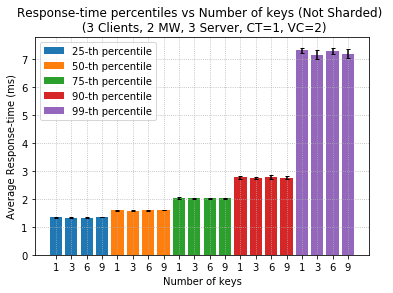

In [39]:
f = plt.figure()
plt.title("Response-time percentiles vs Number of keys (Not Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of keys")

percentiles = [25,50,75,90,99]

for start_idx in [0,1,2,3,4]:
    percentile = percentiles[start_idx]
    vals = df_perc['n_{}_mean'.format(percentile)]
    err = df_perc['n_{}_std'.format(percentile)]

    plt.bar(x = range(1 + start_idx*4, 1 + (start_idx + 1)*4), 
            height = vals, yerr = err, capsize = 2, label='{}-th percentile'.format(percentile))
    
plt.xticks(range(1, 21), [1,3,6,9] * 5)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
    
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_perc_nonsharded.png", dpi = 150)

    

## Import histogram data

In [63]:
# read data into pandas dataframe
df_hist = pd.read_csv(base_path + 'mem_histogram.csv')
df_hist

,client,mw,sharded,ratio,latency,weight
0,1,1,True,1:6,1,0.00
1,1,1,True,1:6,2,0.00
2,1,1,True,1:6,3,0.00
3,1,1,True,1:6,4,0.00
4,1,1,True,1:6,5,0.00
5,1,1,True,1:6,6,0.00
6,1,1,True,1:6,7,0.00
7,1,1,True,1:6,8,0.08
8,1,1,True,1:6,9,0.84
9,1,1,True,1:6,10,8.96


## Histogram sharded get requests

In [91]:
df_s = df_hist[(df_hist['sharded']==True) & (df_hist['client']==3) & (df_hist['mw']==1)] 

In [94]:
df_s = df_hist[(df_hist['sharded']==True)] 

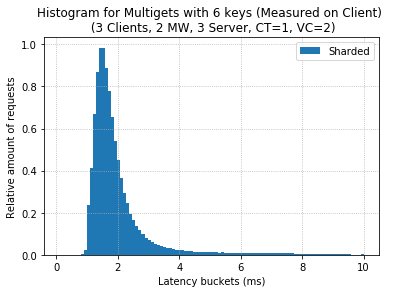

In [135]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on Client) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_s['latency']/10,bins=100,weights=df_s['weight'], density=True, label='Sharded',rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_histogram_sharded.png", dpi = 150)


## Histogram non-sharded get requests

In [102]:
df_n = df_hist[(df_hist['sharded']==False) & (df_hist['client']==3) & (df_hist['mw']==1)] 

In [104]:
df_n = df_hist[(df_hist['sharded']==False)] 

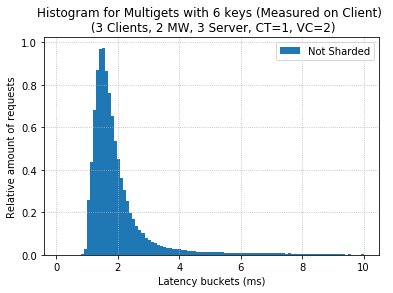

In [134]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on Client) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_n['latency']/10,bins=100,weights=df_n['weight'], density=True, label='Not Sharded', rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_histogram_nonsharded.png", dpi = 150)
